In [1]:
#from symred.utils import contextualQ
#from openfermion.con import is_contextual
from symmer.symplectic import PauliwordOp, random_PauliwordOp, random_symplectic_matrix, StabilizerOp
import numpy as np
import pandas as pd
import time

2022-05-25 14:52:01.773670: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 14:52:01.816325: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 14:52:01.819557: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [2]:
from symmer.utils import QubitOperator_to_dict

def runtime(func, obj, n_samples=10):
    samples = []
    for sample in range(n_samples):
        start = time.time()
        func(obj)
        stop = time.time()
        samples.append(stop - start)
    return sum(samples)/n_samples

Y_symr_square = []
Y_open_square = []
Y_qisk_square = []

n_q = 50
X_square = 2**np.arange(11)

for n_t in X_square:
    print(n_t)
    
    P_symr = random_PauliwordOp(n_q, n_t)
    P_open = P_symr.to_QubitOperator
    P_qisk = P_symr.to_PauliSumOp
    
    #if PauliwordOp(QubitOperator_to_dict(P_open*P_open, n_q)) != (P_symr**2).cleanup(zero_threshold=1e-10):
    #    print('uh-oh')
    
    Y_symr_square.append(runtime(lambda x:x*x, P_symr, n_samples=1))
    Y_open_square.append(runtime(lambda x:x*x, P_open, n_samples=1))
    Y_qisk_square.append(runtime(lambda x:x@x, P_qisk, n_samples=1))

1
2
4
8
16
32
64
128
256


KeyboardInterrupt: 

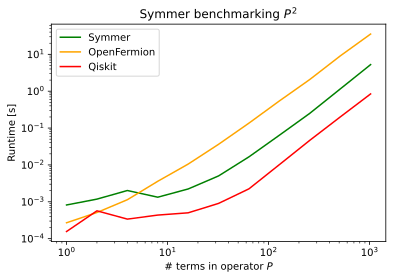

In [15]:
from matplotlib import pyplot as plt

plt.title('Symmer benchmarking $P^2$')

plt.plot(X_square, Y_symr_square, color='green', label='Symmer')
plt.plot(X_square, Y_open_square, color='orange', label='OpenFermion')
plt.plot(X_square, Y_qisk_square, color='red', label='Qiskit')

plt.yscale('log')
plt.xscale('log', base=10)

plt.ylabel('Runtime [s]')
plt.xlabel('# terms in operator $P$')
plt.legend()

In [16]:
from symmer.utils import QubitOperator_to_dict

def runtime(func, obj, n_samples=10):
    samples = []
    for sample in range(n_samples):
        start = time.time()
        func(*obj)
        stop = time.time()
        samples.append(stop - start)
    return sum(samples)/n_samples

Y_symr_single = []
Y_open_single = []
Y_qisk_single = []

n_q = 50
X_single = 2**np.arange(11)

for n_t in X_single:
    print(n_t)
    
    P_symr = random_PauliwordOp(n_q, n_t)
    Q_symr = P_symr[0]
    P_open = P_symr.to_QubitOperator
    Q_open = Q_symr.to_QubitOperator
    P_qisk = P_symr.to_PauliSumOp
    Q_qisk = Q_symr.to_PauliSumOp
    
    Y_symr_single.append(runtime(lambda x,y:x*y, (P_symr, Q_symr), n_samples=1))
    Y_open_single.append(runtime(lambda x,y:x*y, (P_open, Q_open), n_samples=1))
    Y_qisk_single.append(runtime(lambda x,y:x@y, (P_qisk, Q_qisk), n_samples=1))

1
2
4
8
16
32
64
128
256
512
1024


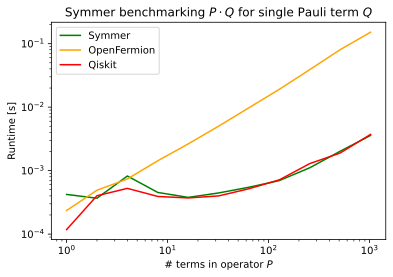

In [18]:
from matplotlib import pyplot as plt

plt.title('Symmer benchmarking $P \cdot Q$ for single Pauli term $Q$')

plt.plot(X_single, Y_symr_single, color='green', label='Symmer')
plt.plot(X_single, Y_open_single, color='orange', label='OpenFermion')
plt.plot(X_single, Y_qisk_single, color='red', label='Qiskit')

plt.yscale('log')
plt.xscale('log', base=10)

plt.ylabel('Runtime [s]')
plt.xlabel('# terms in operator $P$')
plt.legend()

In [23]:
from openfermion.transforms import rotate_qubit_by_pauli
from symmer.utils import QubitOperator_to_dict

Y_symr_rotate = []
Y_open_rotate = []
Y_qisk_rotate = []

n_q = 50
X_single = 2**np.arange(11)

for n_t in X_single:
    print(n_t)
    
    P_symr = random_PauliwordOp(n_q, n_t)
    P_open = P_symr.to_QubitOperator
    R_symr = random_PauliwordOp(n_q, 1)
    R_symr.coeff_vec[0] = 1
    R_open = R_symr.PauliwordOp_to_OF[0]
    
    Y_symr_rotate.append(runtime(lambda x,y:x._rotate_by_single_Pword(y), (P_symr, R_symr), n_samples=1))
    Y_open_rotate.append(runtime(lambda x,y:rotate_qubit_by_pauli(x,y,angle=np.pi/2), (P_open, R_open), n_samples=1))
    #Y_qisk_rotate.append(runtime(lambda x:x@x, P_qisk, n_samples=1))

1


IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

In [44]:
P_symr = random_PauliwordOp(n_q, n_t)
print(P_symr.commutes_termwise(R_symr))
P_symr._rotate_by_single_Pword(R_symr)

[[False]]


-0.004-1.154j IXIYYXIIYZXZYIYYXXIYZXIZZIXXIZIIIIIXIZYYYXYIIZZYIY

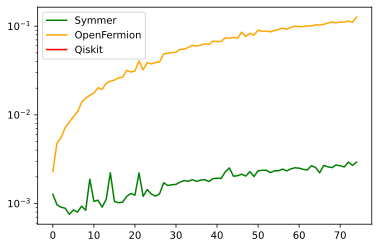

In [74]:
from matplotlib import pyplot as plt

plt.plot(Y_symr, color='green', label='Symmer')
plt.plot(Y_open, color='orange', label='OpenFermion')
plt.plot(Y_qisk, color='red', label='Qiskit')
plt.yscale('log')

plt.legend()

In [ ]:
P_symr = random_PauliwordOp(n_q, n_t)
P_open = sum(P_symr.PauliwordOp_to_OF)
R_symr = random_PauliwordOp(n_q, 1)
R_symr.coeff_vec[0] = 1
R_open = R_symr.PauliwordOp_to_OF[0]

In [69]:
%timeit rotate_qubit_by_pauli(P_open, R_open, angle=np.pi/2)

121 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [70]:
%timeit P_symr._rotate_by_single_Pword(R_symr)

2.62 ms ± 56.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [61]:
P_symr = random_PauliwordOp(n_q, n_t)
P_open = sum(P_symr.PauliwordOp_to_OF)
R_symr = random_PauliwordOp(n_q, 1)
R_symr.coeff_vec[0] = 1
R_open = R_symr.PauliwordOp_to_OF[0]

In [62]:
P_symr._rotate_by_single_Pword(R_symr)

0.251+0.107j YYXYYXIXZZXXXZYZXZXXIXYZXXZYXIXIZYIXXXYZYXZZXZIYIYYXZYIYZIYZXXZYIXZXXIYIYXYIIZIXIZXXXIXXXIYZXIXXIXIX +
-0.560+0.220j YYYXXZXYYIIYIIYXZZYZIIYIXZXXXIZYXXZZZIYYIYYXIYXZYYYYIXYXXYXZIXIXZYYIXYXIZYXYXYYIXZIZYZIXXZXZZIXZXXII +
0.008-0.155j IXYYXIZXZYYIXIYYXXXXIXXIZXZYYZXZXIXZYIIZZYZYZZYXYIZYIIIIIIIXYXXXZXYXIXXIXZXXYYZXYIZIYXZIYYXZIXYYXXXX +
-0.797-1.250j ZIIZZZXIIXIYIYZZZZZXXZIXYZXYYYIIXZXZYYIYIIXIZZIXIYXIYIYYZIYXZIXIXYIZIZIZIYIYIYIZYIZYIZZXYIXIZYZZIXII +
-0.934+0.504j XXYXYZZXZXZYYZYXZYZXXIZXYZYIXIIIXYIIYXIIXYZXZZZZIYIIIIXXIIYIYXZXXXXZZIIZXXZYYZYZZYZZIYYZZZYXIXXIZXIX +
-0.452-0.630j ZXYYIYZYZYXXXZYXYYYZYIIYIZXIYZXIZYXXZXIYXZZXYYIYZIIYYYYXZYZIYXIXIXZIIIIXYYXZXZYXIYIXYZXXXIXZIXIIYIXX +
-0.284-0.434j ZIYXYIZXYIXZIYYZIZIZYYIXXYZXIYIZYYYIZZZYZIXZIYXYXZZXXZIYXXYXYZIZZZZZIIZIIZIXYXIXIIYZYIIIZIYYIXIYYXIX +
0.350-0.077j YIXYIXXIYZXIYXIXYIIIXZXYIIZXIZYXYYXYXYZYYXYXXXYXZXZYIXZIIYIXXZZYIZIIXXZYXZIIXIIIIIXYIYYIYZXYIXYZYIIX +
-0.490-0.549j ZIIZXIIIXZXYXIXIYYZIXIYXIZXIIXYXZZYYIZIIIIYIYXIIIXXXZ

In [44]:
def is_noncontextual(self):
    adjacency_matrix = self.commutes_termwise(self)
    # mask the terms that do not commute universally amongst the operator
    mask_non_universal = np.where(~np.all(adjacency_matrix, axis=1))[0]
    # look only at the unique rows in the masked adjacency matrix -
    # identical rows correspond with operators of the same clique
    unique_commutation_character = np.unique(
        adjacency_matrix[mask_non_universal,:][:,mask_non_universal],
        axis=0
    )
    # if the unique commutation characteristics are disjoint, i.e. no overlapping ones 
    # between rows, the operator is noncontextual - hence we sum over rows and check
    # the resulting vector consists of all ones.
    return np.all(np.count_nonzero(unique_commutation_character, axis=0)==1)

def find_noncontextual(operator):
    # order the operator terms by coefficient magnitude
    check_ops = operator.sort(key='magnitude')
    # initialise as identity with 0 coefficient
    I_symp = np.zeros(2*operator.n_qubits, dtype=int)
    noncontextual_operator = PauliwordOp(I_symp, [0])
    for i in range(check_ops.n_terms):
        if (noncontextual_operator+check_ops[i]).is_noncontextual:
            noncontextual_operator+=check_ops[i]
    return noncontextual_operator

In [45]:
n_qubits = 10

X = []
Y_symp_noncon = []
Y_legacy_noncon = []
Y_symp_random = []
Y_legacy_random = []

for n_terms in range(100):
    print(n_terms)
    X.append(n_terms+1)
    random = random_PauliwordOp(n_qubits,n_terms+1)
    random_list = list(random.to_dictionary.keys())
    noncon = random_PauliwordOp(n_qubits,n_terms, diagonal=True) + random_PauliwordOp(n_qubits,1)
    noncon_list = list(noncon.to_dictionary.keys())
    # contextual operator check
    Y_symp_random.append(runtime(is_noncontextual, random))
    Y_legacy_random.append(runtime(contextualQ, random_list))
    # noncontextual operator check
    Y_symp_noncon.append(runtime(is_noncontextual, noncon))
    Y_legacy_noncon.append(runtime(contextualQ, noncon_list))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


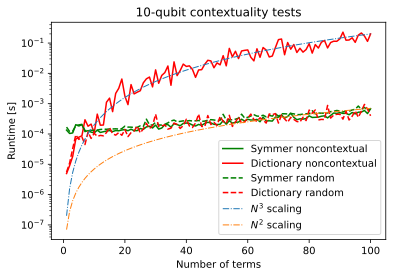

In [47]:
from matplotlib import pyplot as plt

X = np.array(X)

fig, axis = plt.subplots()
# data curves
axis.plot(X, Y_symp_noncon, color='green', label='Symmer noncontextual')
axis.plot(X, Y_legacy_noncon, color='red', label='Dictionary noncontextual')
axis.plot(X, Y_symp_random, color='green', ls='--', label='Symmer random')
axis.plot(X, Y_legacy_random, color='red', ls='--', label='Dictionary random')
# scaling curves
axis.plot(X, 2e-7*np.power(X, 3), label='$N^3$ scaling', ls='-.', lw=1)
axis.plot(X, 7e-8*np.power(X, 2), label='$N^2$ scaling', ls='-.', lw=1)

axis.set_yscale('log')
axis.set_ylabel('Runtime [s]')
axis.set_xlabel('Number of terms')
axis.set_title(f'{n_qubits}-qubit contextuality tests')

axis.legend()
plt.show()

In [187]:
#from openfermion.contextuality import is_contextual